# Lab 6: Confidence Intervals

We'll be using the real data from lab 5 for this lab as well, this time it'll be more used as a background for the main lab. We'd like to first have some 'background' data (presumably signal free) onto which we can inject a simulated signal. So we want to isolate some appropriatre data from our data files. We were working with the LHC file, so we will be faking a background.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [48]:
plt.rcParams["figure.figsize"] = (15,10)

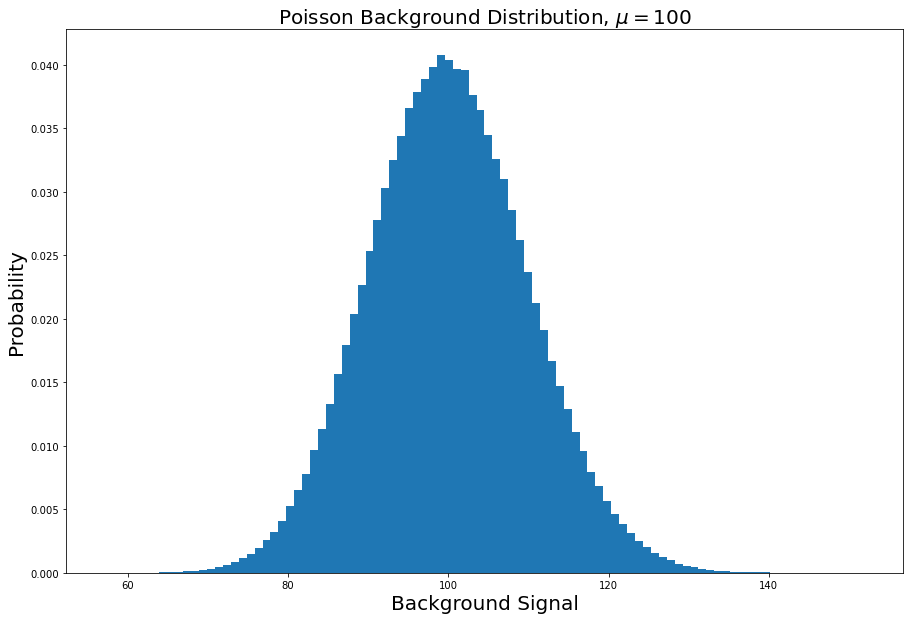

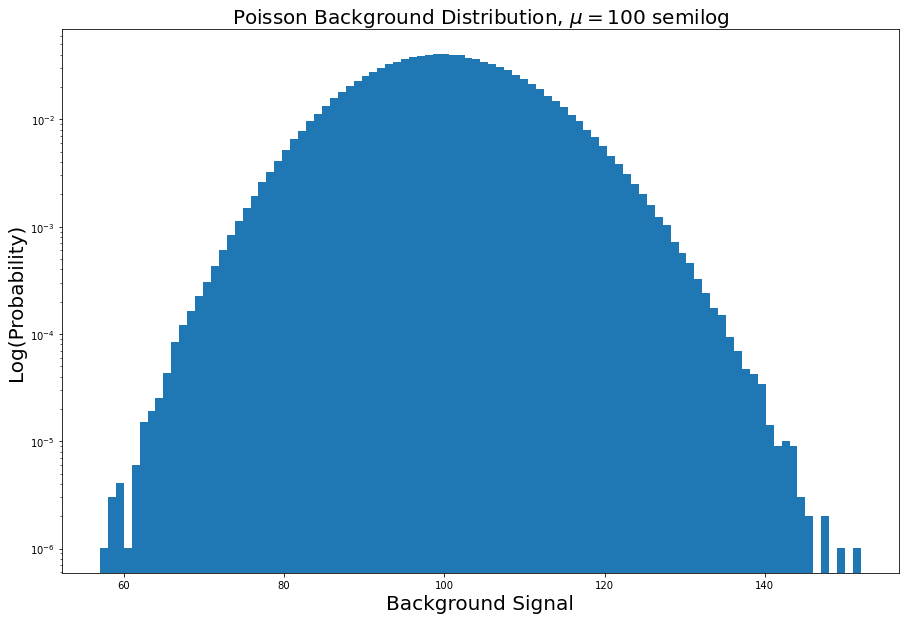

In [49]:
fake_background = stats.poisson.rvs(100,size = 1000000)
plt.hist(fake_background,bins=max(fake_background)-min(fake_background)+1,density=True)
plt.title('Poisson Background Distribution, $\mu = 100$',size = 20)
plt.xlabel('Background Signal',size=20)
plt.ylabel('Probability',size=20)
plt.show()

plt.hist(fake_background,bins=max(fake_background)-min(fake_background)+1,density=True)
plt.title('Poisson Background Distribution, $\mu = 100$ semilog',size = 20)
plt.yscale('log')
plt.xlabel('Background Signal',size=20)
plt.ylabel('Log(Probability)',size=20)
plt.show()

## Problem 1: 5$\sigma$ sensitivity threshold 

In [50]:
prob = stats.norm.cdf(5)
threshold = stats.poisson.ppf(prob, mu=100)
threshold

154.0

The $5\sigma$ sensitivity threshold is a signal of strength 154 for a poisson background distribution with $\mu=100$

## Problem 2: Signal Injection

We want to make our background moderately strong (somewhere in the $(8-30)\sigma$ range. We inject this signal into our background data many time. (We'll be doing a signal of $8.2\sigma$

In [51]:
prob8_2 = stats.norm.cdf(8.2) # i've found that sigma of 8.3 and higher yields strength of inf
signal8_2 = stats.poisson.ppf(prob8_2,mu=100)
print('Signal strength: ' + str(signal8_2))

Signal strength: 192.0


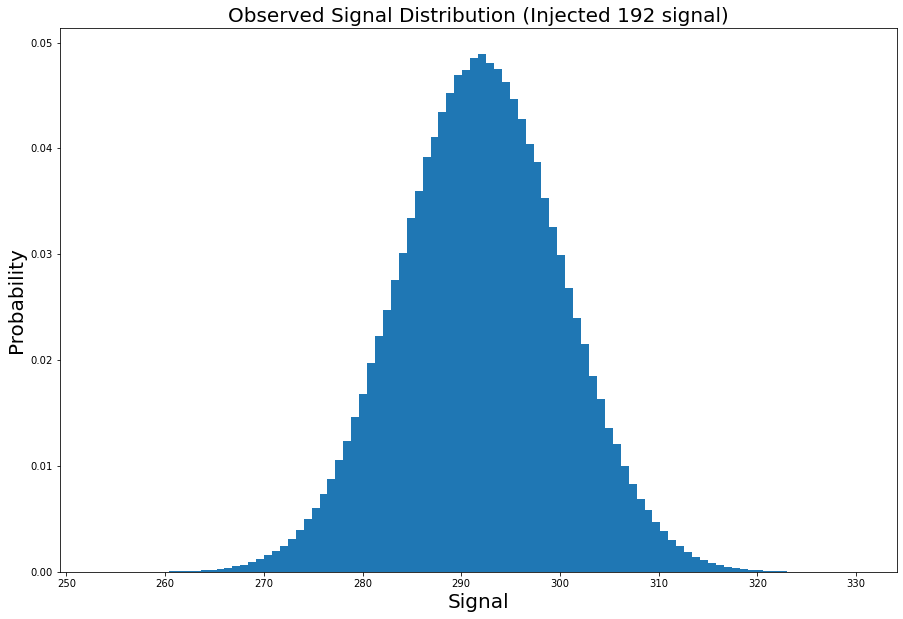

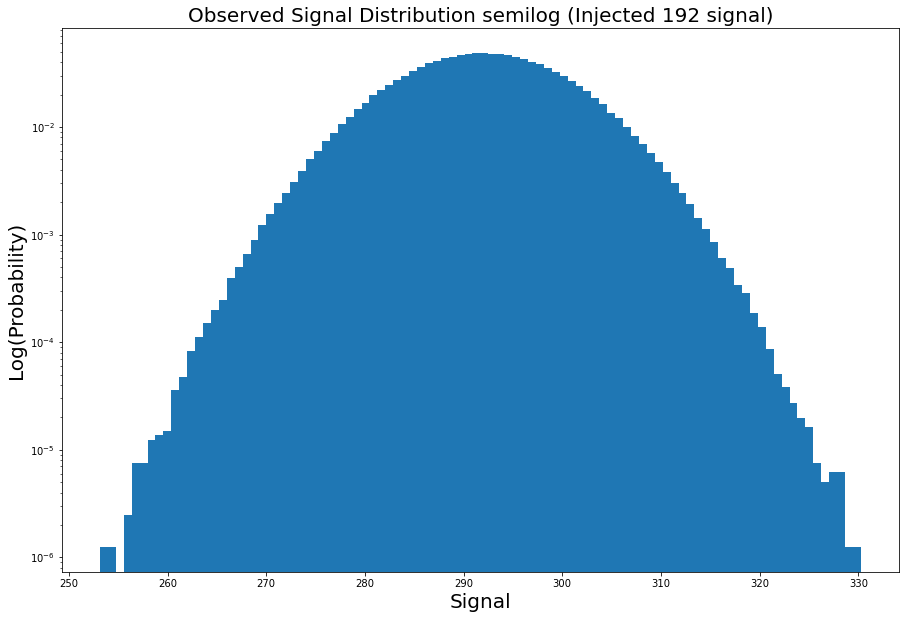

In [52]:
bk_noise = np.random.normal(100,8.2,1000000)
data = bk_noise + signal8_2
plt.hist(data,bins=max(fake_background)-min(fake_background)+1,density=True)
plt.title('Observed Signal Distribution (Injected 192 signal)',size = 20)
plt.xlabel('Signal',size=20)
plt.ylabel('Probability',size=20)
plt.show()

plt.hist(data,bins=max(fake_background)-min(fake_background)+1,density=True)
plt.title('Observed Signal Distribution semilog (Injected 192 signal)',size = 20)
plt.yscale('log')
plt.xlabel('Signal',size=20)
plt.ylabel('Log(Probability)',size=20)
plt.show()

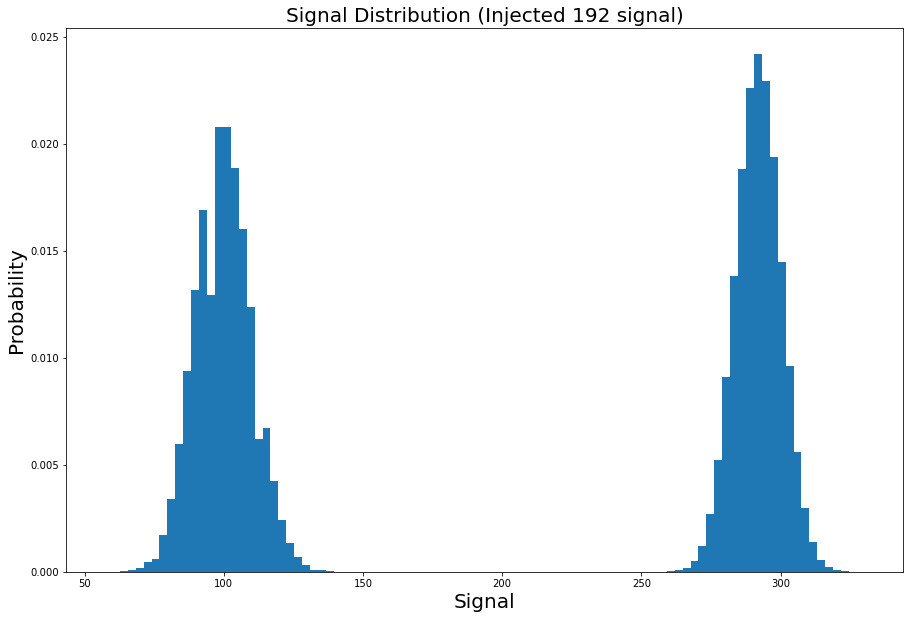

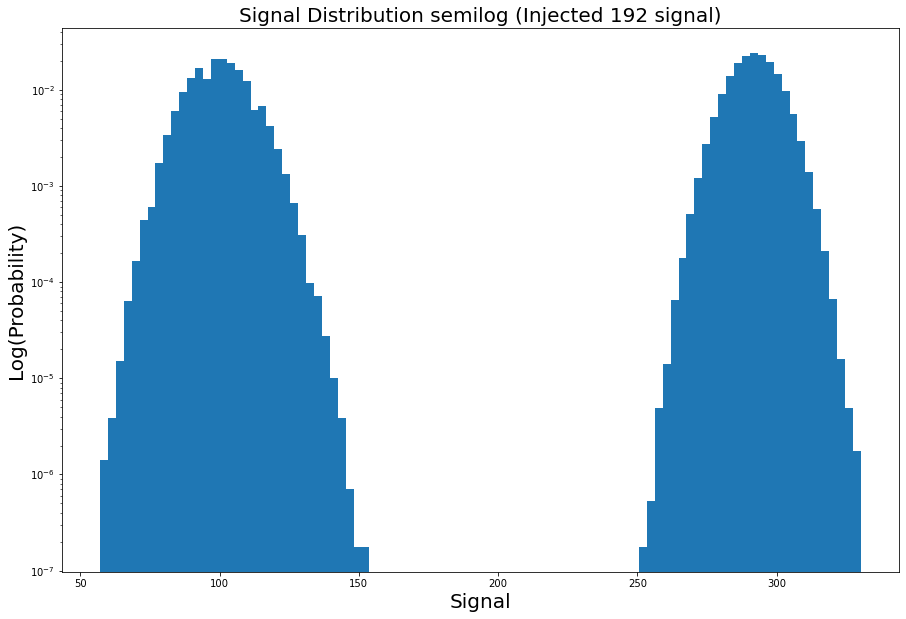

In [53]:
combined_data = np.append(data,fake_background)
plt.hist(combined_data,bins=max(fake_background)-min(fake_background)+1,density=True)
plt.title('Signal Distribution (Injected 192 signal)',size = 20)
plt.xlabel('Signal',size=20)
plt.ylabel('Probability',size=20)
plt.show()

plt.hist(combined_data,bins=max(fake_background)-min(fake_background)+1,density=True)
plt.title('Signal Distribution semilog (Injected 192 signal)',size = 20)
plt.yscale('log')
plt.xlabel('Signal',size=20)
plt.ylabel('Log(Probability)',size=20)
plt.show()

The plot above gives us a clear picture of the means of both observed and injected signals. The mean of the of the injected signal (192) is around 100, while the mean for the observed signal is around 290. So then the observed signal does not have the same mean as the injected signal. Looks like the observed signal is more or less symmetric while the observed and is stronger than the injected signal.

## Problem 3: Suit of injected signals

We want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). We'll be injecting signals from $\sigma$ values 0 all the way to 30. Then we'll inject 1 million uniformly distributed signals into the data like in homework 5.

Text(0.5, 1.0, '2D Histogram of Injected Signal vs.Observed Data')

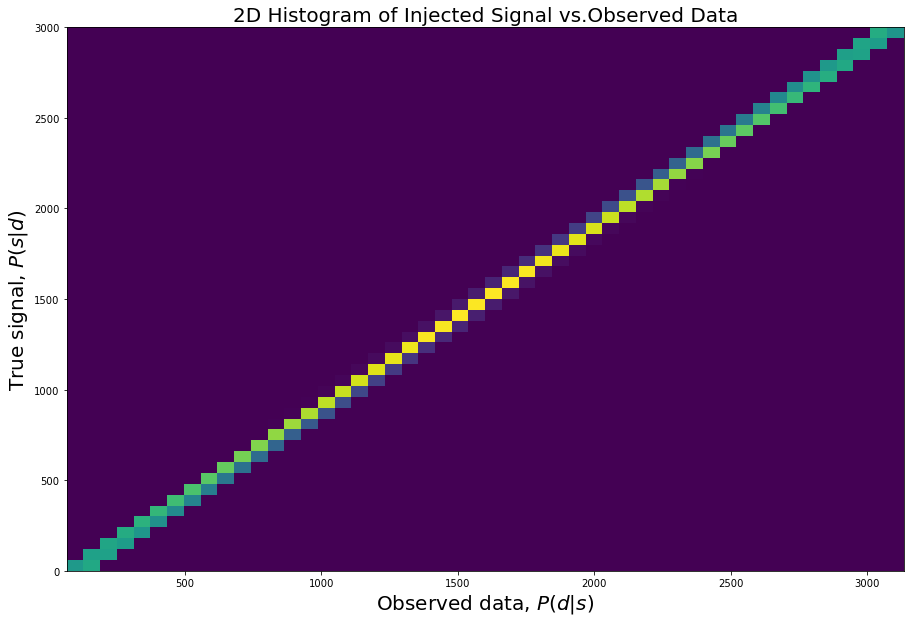

In [54]:
prob0 = stats.norm.cdf(0)
signal0 = stats.poisson.ppf(prob0,mu=100)

sigmas = np.linspace(0,30*signal0, 1000000)
new_data = fake_background + sigmas

plt.hist2d(new_data, sigmas, 50)
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.title("2D Histogram of Injected Signal vs.Observed Data", size =20)


Observed signal strength increases linearly with the strength of the signal data.

For the same injected signal power as in problem 2, below, we see that we get the same answer.

Text(0.5, 1.0, 'Injected Signal vs.Observed Data')

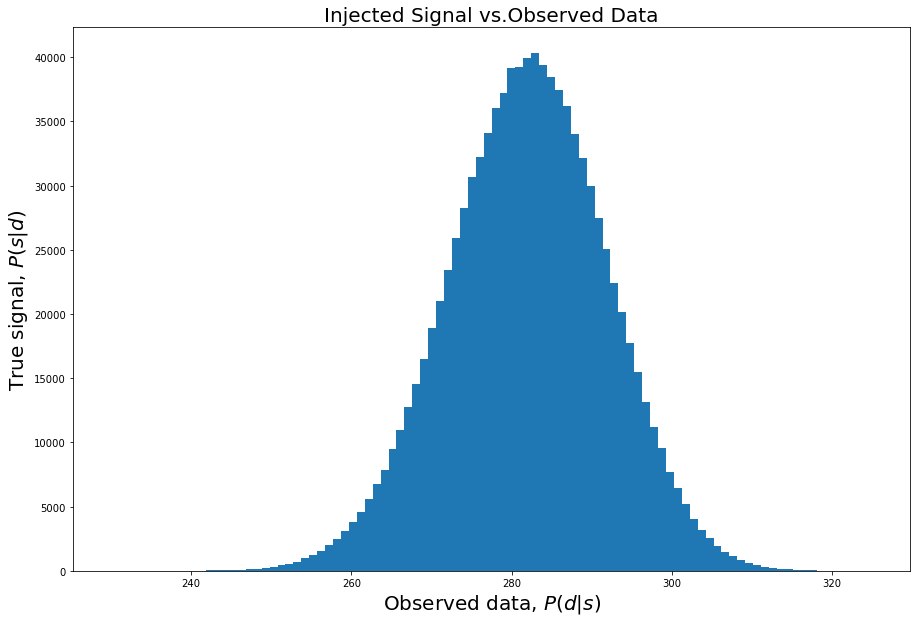

In [55]:
s = stats.poisson.ppf(prob8_2,loc=190, mu=100)

signal = np.ones(1000000)*(s)
injected_signal= signal-fake_background

plt.hist(injected_signal, max(fake_background)-min(fake_background)+1)
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.title('Injected Signal vs.Observed Data', size =20)

 For your observed signal, what is the 1σ uncertainty on the true signal strength?

In [57]:
mean = np.mean(injected_signal)


prob1 = stats.norm.cdf(1)
signal_strength = stats.poisson.ppf(prob1, mean)
print(signal_strength-mean)

upper = stats.poisson.ppf(stats.norm.cdf(1),mean)
lower = stats.poisson.ppf(stats.norm.sf(1),mean)
uncertainty = (upper-lower)/2


print(mean)
print(signal_strength-mean)
print(upper,lower,uncertainty)

17.00282199999998
281.997178
17.00282199999998
299.0 265.0 17.0


1σ uncertainty on the true signal strength is 17.
We also see that upper - lower != 0, so the histogram is not truely symmetric.